In [1]:
import pandas as pd
# Load data from the uploaded CSV file
file_path = "flat-ui__data-Thu Feb 27 2025.csv"

# Read the data
df_gold = pd.read_csv(file_path)

# Display a sample of the data
dataframe = df_gold.head(10)
print(dataframe)


      Date  Price
0  1833-01  18.93
1  1833-02  18.93
2  1833-03  18.93
3  1833-04  18.93
4  1833-05  18.93
5  1833-06  18.93
6  1833-07  18.93
7  1833-08  18.93
8  1833-09  18.93
9  1833-10  18.93


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

# Convert the date column to DateTime format
df_gold['Date'] = pd.to_datetime(df_gold['Date'], errors='coerce')

# Filter only valid data
df_gold = df_gold.dropna()

# Create Feature and Target variables
df_gold['Days'] = (df_gold['Date'] - df_gold['Date'].min()).dt.days
X = df_gold[['Days']]
y = df_gold['Price']

# Split data into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values from the test set
y_pred = model.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Display MAPE
mape


0.7517626420492621

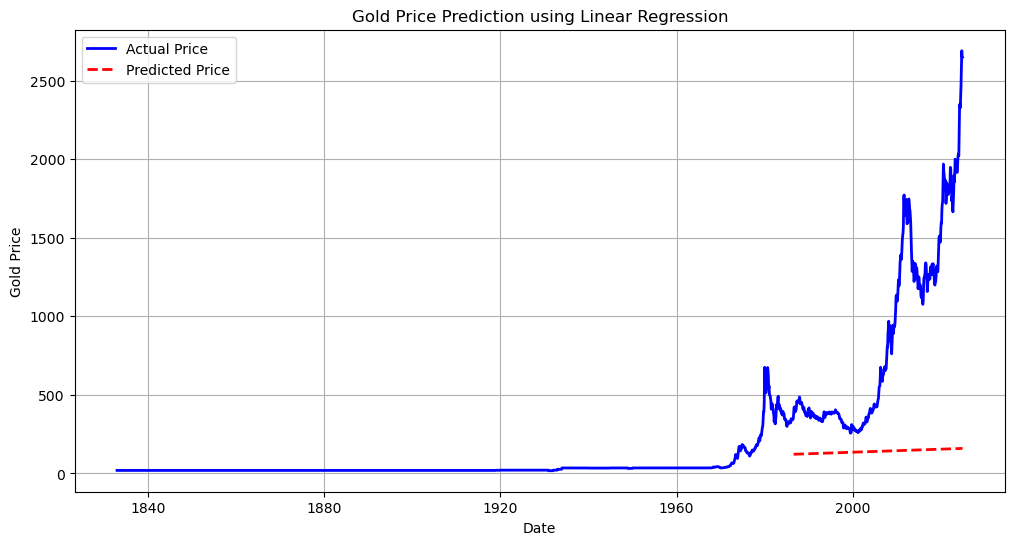

In [3]:
# Plot the graph of actual gold prices versus predicted prices
plt.figure(figsize=(12, 6))

# Graph of actual gold prices
plt.plot(df_gold['Date'], df_gold['Price'], label="Actual Price", color='blue', linewidth=2)

# Graph of predicted gold prices (only for the test set)
plt.plot(df_gold.iloc[len(X_train):]['Date'], y_pred, label="Predicted Price", color='red', linestyle="dashed", linewidth=2)

# Set graph labels and title
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price Prediction using Linear Regression")
plt.legend()
plt.grid(True)

# Display the graph
plt.show()


In [ ]:
# Create a Naïve Forecast Model using the previous day's price as the prediction
y_naive_pred = y_test.shift(1).fillna(method='bfill')  # Use the previous day's value

# Calculate MAPE for the Naïve Forecast Model
mape_naive = mean_absolute_percentage_error(y_test, y_naive_pred)

# Display MAPE
mape_naive


C:\Users\USER\AppData\Local\Temp\ipykernel_656\2288188399.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_naive_pred = y_test.shift(1).fillna(method='bfill')  # ใช้ค่าเดิมของวันก่อนหน้า


0.02589206444375064

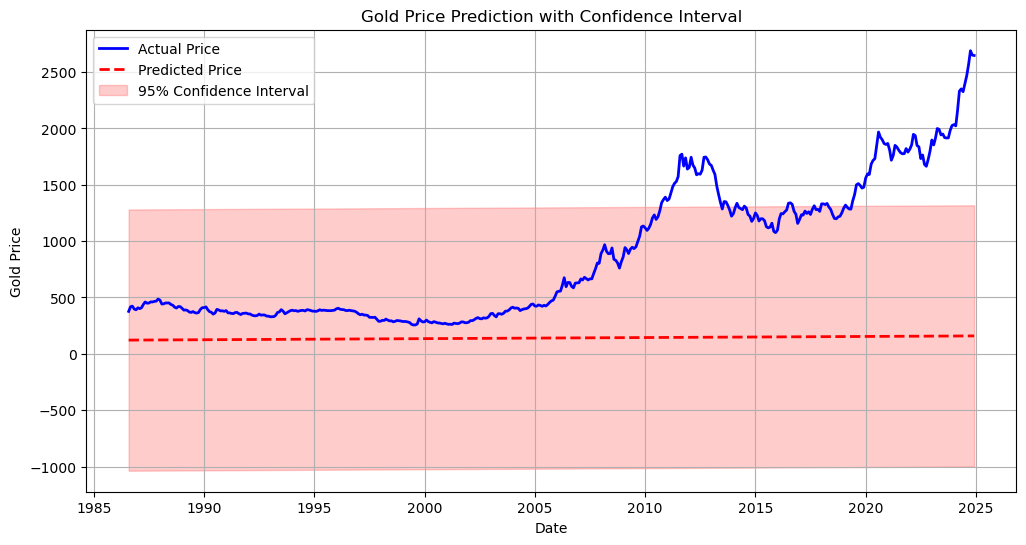

In [7]:
import seaborn as sns

# คำนวณค่าความเชื่อมั่น (Confidence Interval)
y_std = np.std(y_test - y_pred)
confidence_interval = 1.96 * y_std  # 95% Confidence Interval

# พล็อตกราฟราคาทองคำจริงและทำนาย พร้อมช่วงความเชื่อมั่น
plt.figure(figsize=(12, 6))

# ราคาทองคำจริง
plt.plot(df_gold.iloc[len(X_train):]['Date'], y_test, label="Actual Price", color='blue', linewidth=2)

# ราคาทองคำทำนาย
plt.plot(df_gold.iloc[len(X_train):]['Date'], y_pred, label="Predicted Price", color='red', linestyle="dashed", linewidth=2)

# เพิ่มช่วงความเชื่อมั่น
plt.fill_between(df_gold.iloc[len(X_train):]['Date'], 
                 y_pred - confidence_interval, 
                 y_pred + confidence_interval, 
                 color='red', alpha=0.2, label="95% Confidence Interval")

# ตั้งค่ากราฟ
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price Prediction with Confidence Interval")
plt.legend()
plt.grid(True)

# แสดงผล
plt.show()


In [8]:
# กำหนดจำนวนวันข้างหน้าที่ต้องการพยากรณ์
future_days = 30  # พยากรณ์ 30 วันข้างหน้า

# หาวันสุดท้ายของข้อมูลเดิม
last_date = df_gold['Date'].max()
last_day_num = df_gold['Days'].max()

# สร้างช่วงวันใหม่สำหรับการพยากรณ์
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, future_days + 1)]
future_days_num = np.array([last_day_num + i for i in range(1, future_days + 1)]).reshape(-1, 1)

# ใช้โมเดล Linear Regression ทำนายราคาทองคำในอนาคต
future_prices = model.predict(future_days_num)

# สร้าง DataFrame สำหรับผลการพยากรณ์
df_future = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_prices})
print(df_future)


         Date  Predicted Price
0  2024-12-02       159.030715
1  2024-12-03       159.033370
2  2024-12-04       159.036026
3  2024-12-05       159.038681
4  2024-12-06       159.041336
5  2024-12-07       159.043992
6  2024-12-08       159.046647
7  2024-12-09       159.049303
8  2024-12-10       159.051958
9  2024-12-11       159.054613
10 2024-12-12       159.057269
11 2024-12-13       159.059924
12 2024-12-14       159.062580
13 2024-12-15       159.065235
14 2024-12-16       159.067890
15 2024-12-17       159.070546
16 2024-12-18       159.073201
17 2024-12-19       159.075857
18 2024-12-20       159.078512
19 2024-12-21       159.081168
20 2024-12-22       159.083823
21 2024-12-23       159.086478
22 2024-12-24       159.089134
23 2024-12-25       159.091789
24 2024-12-26       159.094445
25 2024-12-27       159.097100
26 2024-12-28       159.099755
27 2024-12-29       159.102411
28 2024-12-30       159.105066
29 2024-12-31       159.107722


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


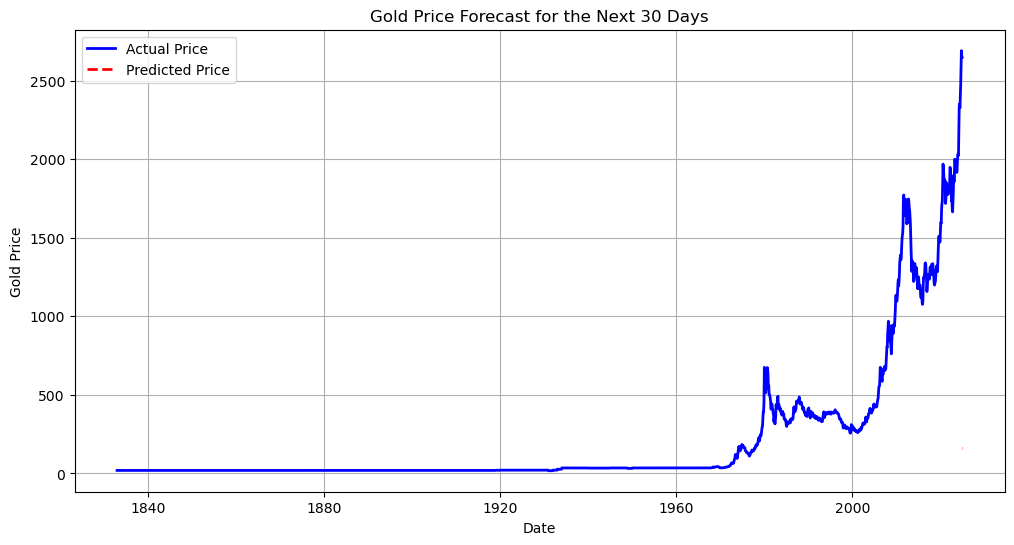

In [9]:
# พล็อตกราฟราคาทองคำในอดีตและอนาคต
plt.figure(figsize=(12, 6))

# กราฟราคาทองคำจริง
plt.plot(df_gold['Date'], df_gold['Price'], label="Actual Price", color='blue', linewidth=2)

# กราฟราคาทองคำพยากรณ์
plt.plot(df_future['Date'], df_future['Predicted Price'], label="Predicted Price", color='red', linestyle="dashed", linewidth=2)

# กำหนดค่าของกราฟ
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price Forecast for the Next 30 Days")
plt.legend()
plt.grid(True)

# แสดงผล
plt.show()


In [10]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# ทดสอบว่า Time Series เป็น Stationary หรือไม่ โดยใช้ ADF Test
adf_test = adfuller(df_gold['Price'])

# ตรวจสอบค่า p-value
adf_test[1]


1.0

In [11]:
# ทำ Differencing (d=1) เพื่อลบแนวโน้มออก
df_gold['Price_diff'] = df_gold['Price'].diff().dropna()

# ทดสอบ ADF Test อีกครั้งหลังทำ Differencing
adf_test_diff = adfuller(df_gold['Price_diff'].dropna())

# ตรวจสอบค่า p-value หลังทำ Differencing
adf_test_diff[1]


3.322961553013125e-11

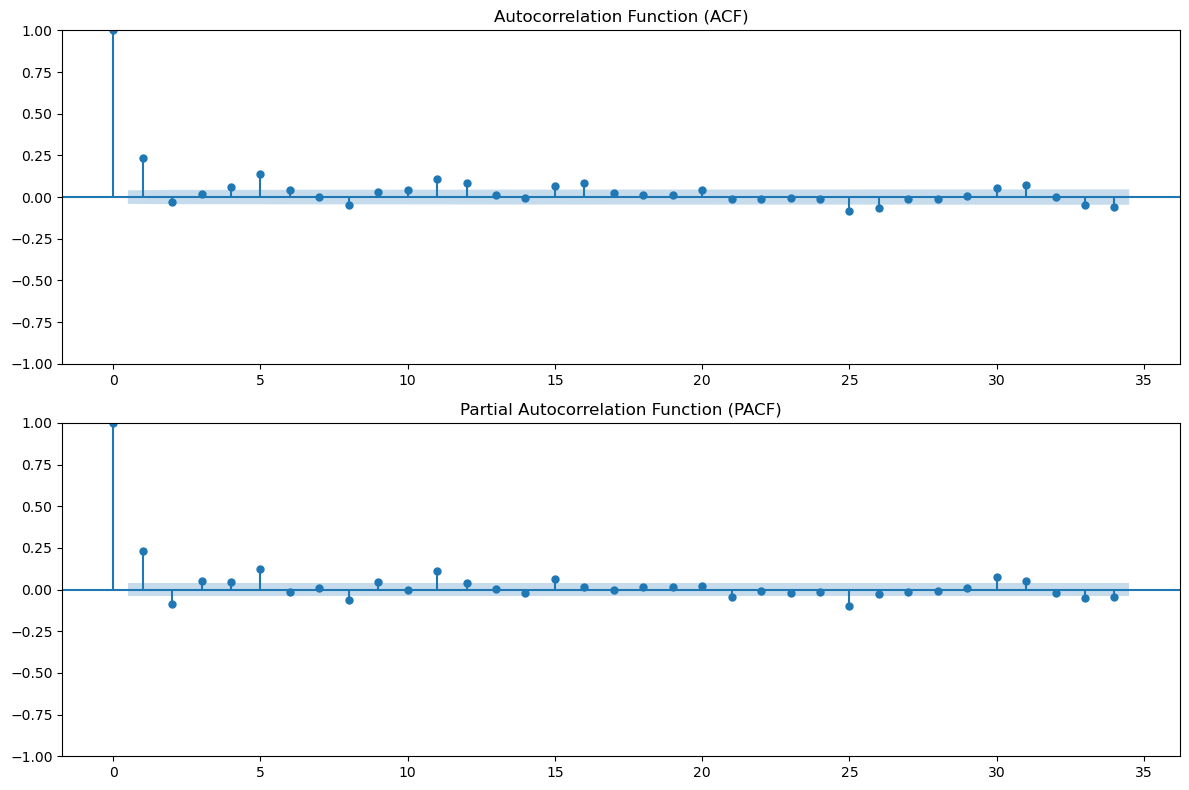

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# พล็อต ACF และ PACF เพื่อตรวจสอบค่า p และ q ที่เหมาะสม
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF (AutoCorrelation Function) ใช้หา q
plot_acf(df_gold['Price_diff'].dropna(), ax=ax[0])
ax[0].set_title("Autocorrelation Function (ACF)")

# PACF (Partial AutoCorrelation Function) ใช้หา p
plot_pacf(df_gold['Price_diff'].dropna(), ax=ax[1])
ax[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


In [13]:
# สร้างและฝึกโมเดล ARIMA
model_arima = sm.tsa.ARIMA(df_gold['Price'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()

# พยากรณ์ 30 วันข้างหน้า
future_days = 30
forecast_arima = model_arima_fit.forecast(steps=future_days)

# สร้างช่วงวันสำหรับการพยากรณ์
future_dates = [df_gold['Date'].max() + pd.Timedelta(days=i) for i in range(1, future_days + 1)]

# สร้าง DataFrame สำหรับผลการพยากรณ์
df_arima_future = pd.DataFrame({'Date': future_dates, 'Predicted Price': forecast_arima})
print(df_arima_future)



           Date  Predicted Price
2304 2024-12-02      2656.060026
2305 2024-12-03      2654.521714
2306 2024-12-04      2654.815677
2307 2024-12-05      2654.759502
2308 2024-12-06      2654.770237
2309 2024-12-07      2654.768185
2310 2024-12-08      2654.768577
2311 2024-12-09      2654.768502
2312 2024-12-10      2654.768517
2313 2024-12-11      2654.768514
2314 2024-12-12      2654.768515
2315 2024-12-13      2654.768514
2316 2024-12-14      2654.768514
2317 2024-12-15      2654.768514
2318 2024-12-16      2654.768514
2319 2024-12-17      2654.768514
2320 2024-12-18      2654.768514
2321 2024-12-19      2654.768514
2322 2024-12-20      2654.768514
2323 2024-12-21      2654.768514
2324 2024-12-22      2654.768514
2325 2024-12-23      2654.768514
2326 2024-12-24      2654.768514
2327 2024-12-25      2654.768514
2328 2024-12-26      2654.768514
2329 2024-12-27      2654.768514
2330 2024-12-28      2654.768514
2331 2024-12-29      2654.768514
2332 2024-12-30      2654.768514
2333 2024-

In [14]:
# กำหนดจำนวนปีข้างหน้าที่ต้องการพยากรณ์
future_years = 30
future_days = future_years * 365  # แปลงเป็นจำนวนวัน

# พยากรณ์ราคาทองคำ 30 ปีข้างหน้า
forecast_arima_long = model_arima_fit.forecast(steps=future_days)

# สร้างช่วงวันสำหรับการพยากรณ์ 30 ปีข้างหน้า
future_dates_long = [df_gold['Date'].max() + pd.Timedelta(days=i) for i in range(1, future_days + 1)]

# สร้าง DataFrame สำหรับผลการพยากรณ์
df_arima_future_long = pd.DataFrame({'Date': future_dates_long, 'Predicted Price': forecast_arima_long})
print(df_arima_future_long)


            Date  Predicted Price
2304  2024-12-02      2656.060026
2305  2024-12-03      2654.521714
2306  2024-12-04      2654.815677
2307  2024-12-05      2654.759502
2308  2024-12-06      2654.770237
...          ...              ...
13249 2054-11-20      2654.768514
13250 2054-11-21      2654.768514
13251 2054-11-22      2654.768514
13252 2054-11-23      2654.768514
13253 2054-11-24      2654.768514

[10950 rows x 2 columns]


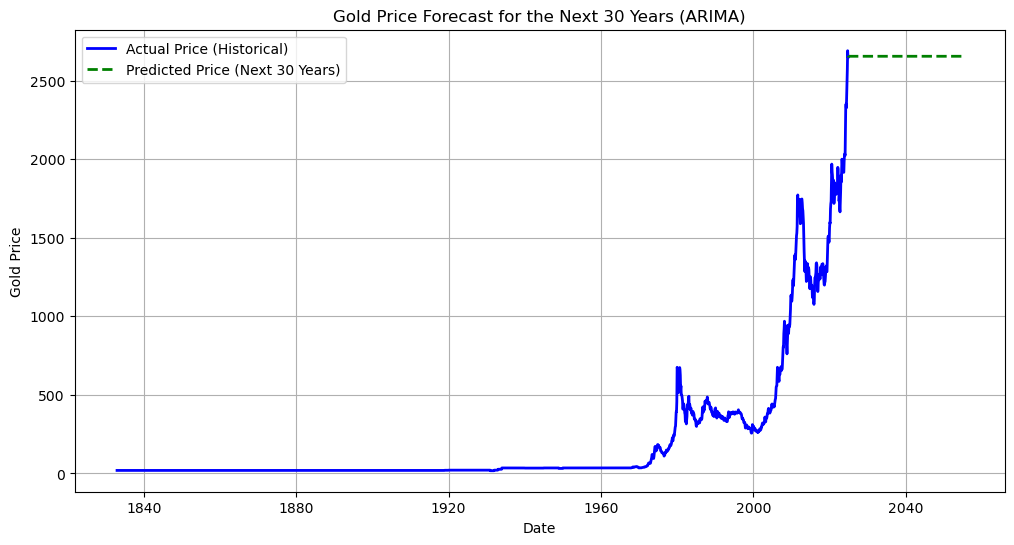

In [15]:
import matplotlib.pyplot as plt

# พล็อตกราฟราคาทองคำในอดีตและพยากรณ์อีก 30 ปีข้างหน้า
plt.figure(figsize=(12, 6))

# กราฟราคาทองคำจริง (ข้อมูลเดิม)
plt.plot(df_gold['Date'], df_gold['Price'], label="Actual Price (Historical)", color='blue', linewidth=2)

# กราฟราคาทองคำพยากรณ์ 30 ปีข้างหน้า
plt.plot(df_arima_future_long['Date'], df_arima_future_long['Predicted Price'], 
         label="Predicted Price (Next 30 Years)", color='green', linestyle="dashed", linewidth=2)

# ตั้งค่ากราฟ
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price Forecast for the Next 30 Years (ARIMA)")
plt.legend()
plt.grid(True)

# แสดงผล
plt.show()


In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# กำหนดค่า (p, d, q) และ (P, D, Q, S) สำหรับ SARIMA
p, d, q = 1, 1, 1  # ค่า ARIMA
P, D, Q, S = 1, 1, 1, 12  # Seasonal component (S = 12 คือรูปแบบฤดูกาลรายปี)

# สร้างและฝึกโมเดล SARIMA
model_sarima = SARIMAX(df_gold['Price'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_sarima_fit = model_sarima.fit()

# พยากรณ์ราคาทองคำ 30 ปีข้างหน้า
forecast_sarima = model_sarima_fit.forecast(steps=future_days)

# สร้างช่วงวันสำหรับการพยากรณ์ 30 ปีข้างหน้า
df_sarima_future_long = pd.DataFrame({'Date': future_dates_long, 'Predicted Price': forecast_sarima})

print(df_sarima_future_long)

            Date  Predicted Price
2304  2024-12-02      2670.360049
2305  2024-12-03      2674.087835
2306  2024-12-04      2683.728392
2307  2024-12-05      2700.174357
2308  2024-12-06      2701.534279
...          ...              ...
13249 2054-11-20     50196.431205
13250 2054-11-21     50199.303989
13251 2054-11-22     50207.704838
13252 2054-11-23     50208.107168
13253 2054-11-24     50206.165627

[10950 rows x 2 columns]


In [17]:
# กำหนดช่วงเวลาการพยากรณ์ใหม่: 10 ปี (3,650 วัน)
future_years_short = 10
future_days_short = future_years_short * 365  # แปลงเป็นจำนวนวัน

# พยากรณ์ราคาทองคำ 10 ปีข้างหน้า
forecast_sarima_short = model_sarima_fit.forecast(steps=future_days_short)

# สร้างช่วงวันสำหรับการพยากรณ์ 10 ปีข้างหน้า
future_dates_short = [df_gold['Date'].max() + pd.Timedelta(days=i) for i in range(1, future_days_short + 1)]

# สร้าง DataFrame สำหรับผลการพยากรณ์
df_sarima_future_short = pd.DataFrame({'Date': future_dates_short, 'Predicted Price': forecast_sarima_short})

print(df_sarima_future_short)

           Date  Predicted Price
2304 2024-12-02      2670.360049
2305 2024-12-03      2674.087835
2306 2024-12-04      2683.728392
2307 2024-12-05      2700.174357
2308 2024-12-06      2701.534279
...         ...              ...
5949 2034-11-25     18513.685452
5950 2034-11-26     18514.941452
5951 2034-11-27     18514.543766
5952 2034-11-28     18529.598691
5953 2034-11-29     18535.649451

[3650 rows x 2 columns]


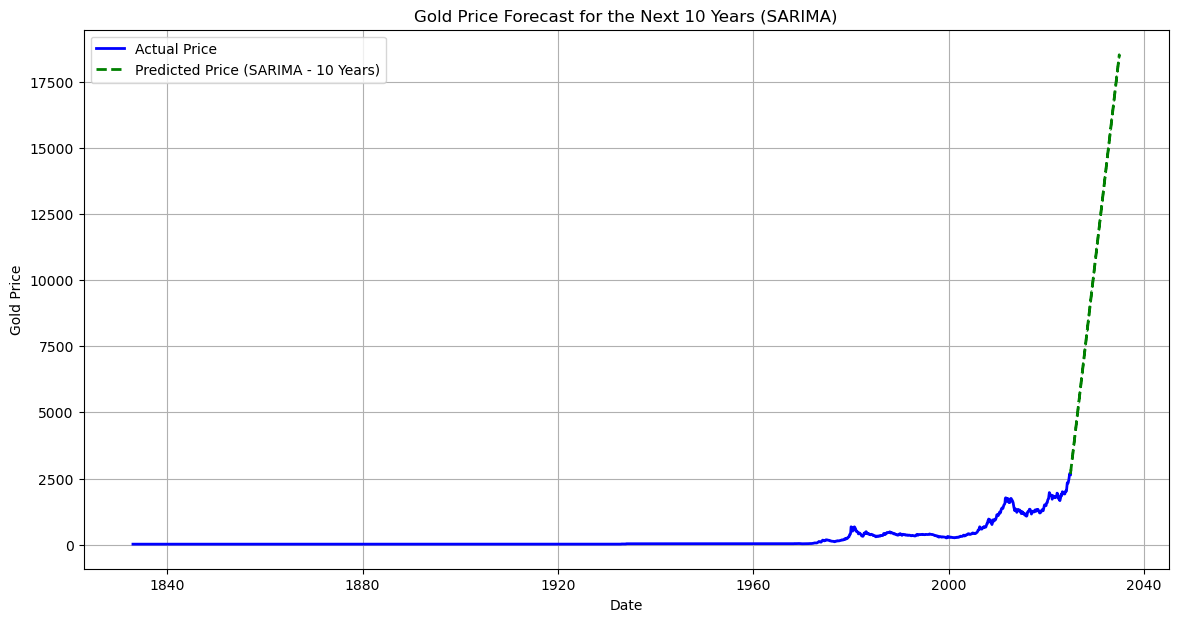

In [18]:
# พล็อตกราฟราคาทองคำจริงและพยากรณ์จาก SARIMA (10 ปีข้างหน้า)
plt.figure(figsize=(14, 7))

# กราฟราคาทองคำจริง
plt.plot(df_gold['Date'], df_gold['Price'], label="Actual Price", color='blue', linewidth=2)

# กราฟราคาทองคำพยากรณ์จาก SARIMA (10 ปีข้างหน้า)
plt.plot(df_sarima_future_short['Date'], df_sarima_future_short['Predicted Price'], 
         label="Predicted Price (SARIMA - 10 Years)", color='green', linestyle="dashed", linewidth=2)

# กำหนดค่าของกราฟ
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price Forecast for the Next 10 Years (SARIMA)")
plt.legend()
plt.grid(True)

# แสดงผล
plt.show()
